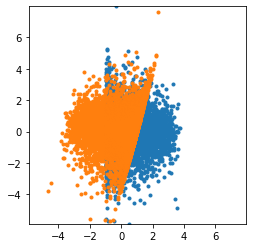

In [20]:
# Code on ICA using negentropy

import numpy as np
import matplotlib.pyplot as plt

def znorm(x):
    x -= x.mean()
    x /= x.std()
    x = x.reshape(1,-1)
    return x

N = 10000
g = np.random.randn(N)
x1 = znorm(np.random.rand(N))
x2 = znorm(np.random.rand(N))
x1 = znorm(np.random.laplace(size=N))
x2 = znorm(np.random.laplace(size=N))
x1 = znorm(np.random.beta(0.5, 2, N))
#x2 = -znorm(np.random.beta(0.5, 2, N))

x = np.concatenate((x1,x2), axis=0)

A = np.random.randn(2,2)
(Q, R) = np.linalg.qr(A)
x.shape
#plt.hist(g,40, density=True);
#plt.hist(x1,40, density=True);
z = Q@x
plt.plot(x[0,:], x[1,:], '.')
plt.plot(z[0,:], z[1,:], '.')

mn = min(z.min(), x.min())
mx = max(z.max(), x.max())
plt.xlim((mn,mx))
plt.ylim((mn,mx))

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

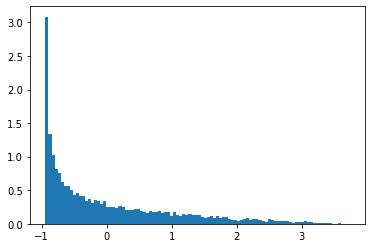

In [21]:
plt.hist(x1.reshape(-1,), 100, density=True);

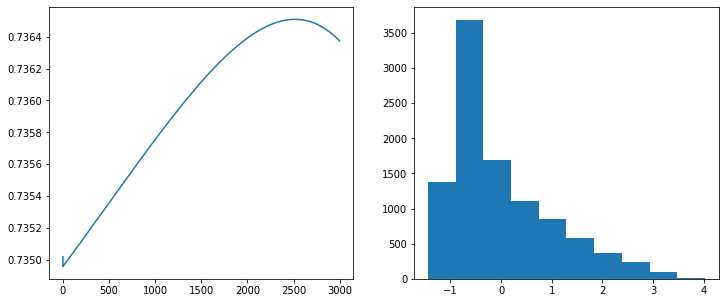

In [22]:
def gradient_descent(z, which_G='G1'):
    gauss_rv = np.random.randn(N)
    w0 = np.random.randn(2,1)
    w = w0
    w /= np.linalg.norm(w)
    
    gamma = 1
    Js = []
    kurts = []
    a1 = 1.5
    
    if which_G == 'G1':
        g = lambda x : np.tanh(a1*x)
        G = lambda x : (1./a1)*np.log(np.cosh(a1*x))
    elif which_G == 'G2':
        g = lambda x : x*np.exp(-(x**2.)/2.)
        G = lambda x : -np.exp(-(x**2.)/2.)
    elif which_G == 'G3':
        g = lambda x : x**3.
        G = lambda x : x**4.
        
    lr = 1.
    Js = []
    E_gauss_rv = np.mean(G(gauss_rv))
    gammas = []
    for iter in range(3000):
        gammas.append(gamma)
        y = w.T@z
        kurt = (y**4).mean()-3*np.mean(y**2)**2
        kurts.append(kurt)
        Dw = gamma*np.mean(z*g(y), axis=1)
        Dw = Dw.reshape(-1,1)
        w += lr*Dw
        w /= np.linalg.norm(w)

        Dgamma = (np.mean(G(y))-E_gauss_rv)-gamma
        gamma += lr*Dgamma
        Js.append((np.mean(G(y))-E_gauss_rv)**2)
        

    plt.plot(kurts)
    #plt.plot(gammas)
    return w

plt.figure(figsize=(12,5))

plt.subplot(121)
for t in range(1):
    w = gradient_descent(z, 'G1')

sest = w.T@z
sest = sest.reshape(-1,)

plt.subplot(122)
plt.hist(sest);



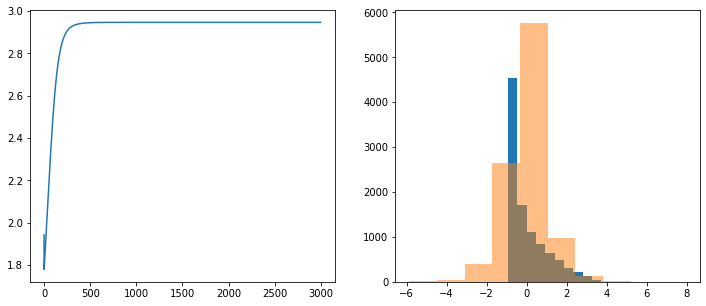

In [23]:
def stochastic_gradient_descent(z, which_G='G1'):
    gauss_rv = np.random.randn(N)
    w0 = np.random.randn(2,1)
    w = w0
    w /= np.linalg.norm(w)
    
    gamma = -10.11
    Js = []
    kurts = []
    a1 = 1.5
    
    if which_G == 'G1':
        g = lambda x : np.tanh(a1*x)
        G = lambda x : (1./a1)*np.log(np.cosh(a1*x))
    elif which_G == 'G2':
        g = lambda x : x*np.exp(-(x**2.)/2.)
        G = lambda x : -np.exp(-(x**2.)/2.)
    elif which_G == 'G3':
        g = lambda x : x**3.
        G = lambda x : x**4.
        
    lr = 1.
    
    E_gauss_rv = np.mean(G(gauss_rv))
    for iter in range(10):
        y = w.T@z
        kurt = (y**4).mean()-3*(np.mean(y**2))**2
        
        for i in range(N):
            yi = (w.T@z[:,i])[0]
            Dw = gamma*z[:,i]*g(yi)
            Dw = Dw.reshape(-1,1)
            w += lr*Dw
            w /= np.linalg.norm(w)

            #Dgamma = (G(yi)-E_gauss_rv)-gamma
            #gamma += lr*Dgamma
            #gamma = -.05
            #gamma = -0.05
            #gamma = (np.mean(G(y.reshape(-1,)))-E_gauss_rv)
        kurts.append(kurt)
    plt.plot(kurts)
    return w

plt.figure(figsize=(12,5))
plt.subplot(121)

for t in range(1):
    w = gradient_descent(z, 'G2')

sest = w.T@z
sest = sest.reshape(-1,)
z1 = z[0,:]

plt.subplot(122)
plt.hist(x1.reshape(-1,));
plt.hist(sest,alpha=0.5);


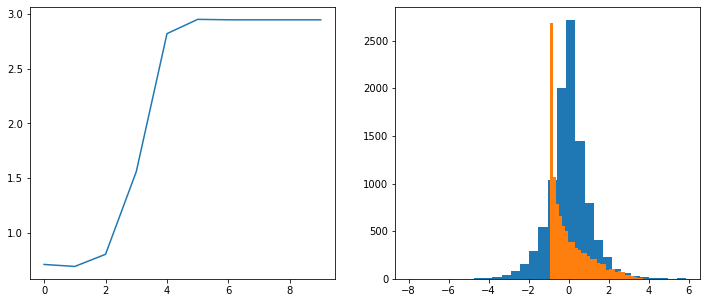

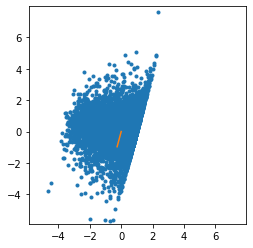

In [26]:
def fixed_point(z, which_G = 'G1'):
    w0 = np.random.randn(2,1)
    w = w0
    w /= np.linalg.norm(w)
    
    gamma = -10.11
    Js = []
    kurts = []
    a1 = 1
    
    if which_G == 'G1':
        gp = lambda x : a1*(1.-(np.tanh(a1*x)**2))
        g = lambda x : np.tanh(a1*x)
        G = lambda x : (1./a1)*np.log(np.cosh(a1*x))
    elif which_G == 'G2':
        gp = lambda x : (1.-x**2)*np.exp(-(x**2)/2.)
        g = lambda x : x*np.exp(-(x**2.)/2.)
        G = lambda x : -np.exp(-(x**2.)/2.)
    elif which_G == 'G3':
        gp = lambda x : 3
        g = lambda x : x**3.
        G = lambda x : x**4.
    
    ws = []
    kurts = []
    ws.append(w)
    for iter in range(10):
        y = w.T@z
        kurt = (y**4).mean()-3*(np.mean(y**2))**2
        kurts.append(kurt)
        w = np.mean(z*g(y), axis=1)-np.mean(gp(y))*w.reshape(-1,)
        w /= np.linalg.norm(w)
        ws.append(w)
        
    plt.plot(kurts)
    
    return w
    
plt.figure(figsize=(12,5))
plt.subplot(121)
for t in range(1):
    w = fixed_point(z, 'G2').T

plt.subplot(122)
sest = w@z
sest = sest.reshape(-1,)
z1 = z[0,:]
plt.hist(sest, 30);
plt.hist(x1.reshape(-1,), 30);

plt.figure()

plt.plot(z[0,:], z[1,:], '.')
plt.plot([0, w[0]], [0, w[1]])

mn = min(z.min(), x.min())
mx = max(z.max(), x.max())
plt.xlim((mn,mx))
plt.ylim((mn,mx))

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()